<a href="https://colab.research.google.com/github/PeKkaPie95/GenAI-Creative-Text-and-Image-Generation/blob/dataCollection/datasetLookingFine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing and cleaning the dataset

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

In [ ]:

result=[]
errors=[]
Total_errors=[]
def web_scrape1(url, i, ind):
# Send a GET request to the webpage
  response = requests.get(url)

# Check if the request was successful
  if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the title
    title = soup.find('h1').text.strip() if soup.find('h1') else "Title not found"

    # Extract the author
    author_div = soup.find('div', attrs={"data-byline-author": True})
    author = author_div.text.strip() if author_div else "Author not found"

    # Extract the poem text
    main_poem = soup.find('div', id='block-stanza-content')
    poem_lines = main_poem.find_all('span', class_='long-line') or main_poem.find_all('pre') or main_poem.find_all('p')
    if poem_lines:
      poem_text = "\n".join([line.text.strip() for line in poem_lines])

    else:
      print("Poem not found")
      err_info = {
          "Page": i,
          "URL": url
      }
      errors.append(err_info)
      Total_errors.append(ind)



    # Structure the poem data
    poem_data = {

        "poem": poem_text
    }

    # Print the poem details to the console

    #print(poem_data["poem"])
    #result.append({"Poem": poem_data["poem"]})
    return poem_data

  else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")



def web_scrape2(url, i):

  res= requests.get(url) # Here, we sent an http request for this website
  if res.status_code==200:
    # Checking if the http request has been completed
    soup= BeautifulSoup(res.content, 'html.parser') # parsing the content of the page
    poems=soup.select('tr') # Selecting all 'tr' elements with select method

    if not poems:
            print("No tr found with the specified class.")
            return
    for ind, poem in enumerate(poems):
      title_cell = poem.find('td', class_="views-field-title") # Finding the title element inside a particular poem, by specifying a class particular to poem titles
      #Finding the poet name element inside a particular poem, by specifying a class particular to poet names
      poet_cell = poem.find('td', class_="views-field-field-author")
      #Finding the date element inside a particular poem, by specifying a class particular to dates
      date_cell = poem.find('td', class_="views-field-field-date-published")
      if title_cell and poet_cell and date_cell:

                title = title_cell.find('a').text.strip() #Finding title text inside 'a', and stripping off any whitespaces
                poem_url = "https://poets.org" + title_cell.select('a')[0].get('href') # Adding link to a particular poem, stored in href attribute of its 'a' tag, by get method
                poet_link = poet_cell.find('a')
                poet = poet_link.text.strip() if poet_link else "N/A" # checking if poet's name is given or not
                time_tag = date_cell.find('time')
                date = time_tag.text.strip() if time_tag else "N/A"
                print(f"\033[1mTitle\033[0m: {title}, Poem URL: {poem_url}, Poet: {poet}, Date: {date}")

                poem_data = {
                              "Title": title,
                              "Author": poet,
                              "Date": date,
                              "Poem": web_scrape1(poem_url, i, ind)
                            }
                result.append([poem_data]) # Adding the poem data in result list
                #web_scrape1(poem_url, i, ind)

  else:
        print(f"Failed to retrieve page: {res.status_code}")

for i in range(101):
  print(f"Page : {i}")
  web_scrape2("https://poets.org/poems? "+f"page={i}", i)

print(str(len(Total_errors)) + " errors occured")
print(errors)

Page : 0
Title: A Line-storm Song, Poem URL: https://poets.org/poem/line-storm-song, Poet: Robert Frost, Date: 1913


KeyboardInterrupt: 

In [ ]:
from google.colab import files

with open("merged_file.json", "w") as outfile:
    json.dump(result, outfile)
files.download("mg.json")

NameError: name 'result' is not defined

In [ ]:
import json
import re
# Load raw data from the JSON file
with open("/content/merged_file.json", "r") as f:
    data = json.load(f)
print(type(data))
print(data[:5])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Cleaning the dataset


In [ ]:

# Process each poem in the nested structure
cleansed_data_list = []

for entry in data:
    # Each entry is a list containing a dictionary
    if isinstance(entry, list) and len(entry) > 0 and isinstance(entry[0], dict):
        poem_data = entry[0]  # Access the dictionary inside the list

        # Extract fields safely
        title = poem_data.get("Title", "Untitled")
        author = poem_data.get("Author", "Unknown")
        poem_text = poem_data.get("Poem", {}).get("poem", "")

        # Cleansing process for the poem text
        cleaned_poem = re.sub(r"[^\w\s,.'-]", "", poem_text)  # Removes special characters except basic ones
        cleaned_poem = re.sub(r"\s+", " ", cleaned_poem)  # Replaces multiple spaces with a single space
        cleaned_poem = cleaned_poem.replace(" .", ".").replace(" ,", ",")  # Fix misplaced spaces before punctuation

        # Preserving line breaks
        lines = [line.strip() for line in cleaned_poem.split("\n") if line.strip()]  # Remove empty lines
        cleaned_poem = "\n".join(lines)

        # Append the cleansed data
        cleansed_data_list.append({
            "title": title,
            "author": author,
            "poem": cleaned_poem,
            "date": poem_data.get("Date", "Unknown")
        })

# Print the cleansed poems
for cleansed_data in cleansed_data_list:
    print("Cleansed Poem:\n")
    print(f"Title: {cleansed_data['title']}")
    print(f"Author: {cleansed_data['author']}")
    print(f"Date: {cleansed_data['date']}")

    print(cleansed_data['poem'])

Cleansed Poem:

Title: A Line-storm Song
Author: Robert Frost
Date: 1913
The line-storm clouds fly tattered and swift, The road is forlorn all day, Where a myriad snowy quartz stones lift, And the hoof-prints vanish away. The roadside flowers, too wet for the bee, Expend their bloom in vain. Come over the hills and far with me, And be my love in the rain. The birds have less to say for themselves In the wood-worlds torn despair Than now these numberless years the elves, Although they are no less there All song of the woods is crushed like some Wild, easily shattered rose. Come, be my love in the wet woods come, Where the boughs rain when it blows. There is the gale to urge behind And bruit our singing down, And the shallow waters aflutter with wind From which to gather your gown. What matter if we go clear to the west, And come not through dry-shod For wilding brooch shall wet your breast The rain-fresh goldenrod. Oh, never this whelming east wind swells But it seems like the seas retu

In [ ]:
with open("cleansed1.txt", "w") as f:
    json.dump(cleansed_data_list, f)

In [ ]:
from google.colab import files

files.download('cleansed1.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# To merge JSON files if needed


In [ ]:
import json

# Load the first JSON file
with open("/content/dataset (2).json", "r", encoding="utf-8") as f1:
    data1 = json.load(f1)

# Load the second JSON file
with open("/content/dataset.json", "r", encoding="utf-8") as f2:
    data2 = json.load(f2)

# Merge the files based on their structure
if isinstance(data1, list) and isinstance(data2, list):
    # Combine the two lists
    merged_data = data1 + data2
elif isinstance(data1, dict) and isinstance(data2, dict):
    # Merge two dictionaries
    merged_data = {**data1, **data2}
else:
    raise ValueError("The JSON files have incompatible structures.")

# Save the merged data to a new file
with open("merged_file.json", "w", encoding="utf-8") as outfile:
    json.dump(merged_data, outfile, ensure_ascii=False, indent=4)

print("Files merged successfully!")


Files merged successfully!


# EDA on the cleansed dataset

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

file_path = '/content/merged_file.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Flatten the nested structure into separate columns
flattened_data = pd.json_normalize(df[0])
flattened_data.rename(columns={'Poem.poem': 'Poem'}, inplace=True)

print("\n1. Total number of poems:", len(flattened_data))
print("\n2. Number of unique authors:", flattened_data['Author'].nunique())
print("\n3. List of authors:", flattened_data['Author'].unique())
print("\n4. Distribution of publication years:")
print(flattened_data['Date'].value_counts().sort_index())



1. Total number of poems: 335

2. Number of unique authors: 125

3. List of authors: ['Robert Frost' 'Langston Hughes' 'Margaret Atwood' 'Nâzim Hikmet'
 'Aimee Nezhukumatathil' 'John Donne' 'Ross Gay' 'Frank O’Hara'
 'Elizabeth Bishop' 'Matsuo Bashō' 'William Makepeace Thackeray'
 'Emily Dickinson' 'Henry Wadsworth Longfellow' 'Robert Burns'
 'Donika Kelly' 'Lawrence Ferlinghetti' 'David McCord' 'Robert Hayden'
 'Lydia Maria Child' 'Ella Wheeler Wilcox' 'Jamaal May' 'Margaret Walker'
 'Jericho Brown' 'Robert Herrick' 'W. B. Yeats' 'Christina Rossetti'
 'Claudia Rankine' 'Jane Hirshfield' 'Terrance Hayes'
 'Paul Laurence Dunbar' 'Edward Lear' 'Clement Clarke Moore' 'Yona Harvey'
 'Phillis Wheatley' 'Maya Angelou' 'E. E. Cummings' 'Edgar Allan Poe'
 'Rita Dove' 'John Keats' 'William Shakespeare' 'Kahlil Gibran'
 'Naomi Shihab Nye' 'Oscar Wilde' 'Sonia Sanchez' 'Melvin Dixon'
 'Lucille Clifton' 'Anonymous' 'June Jordan' 'George Gordon Byron'
 'Henry Cuyler Bunner' 'Francis Scott Key' 'Ma

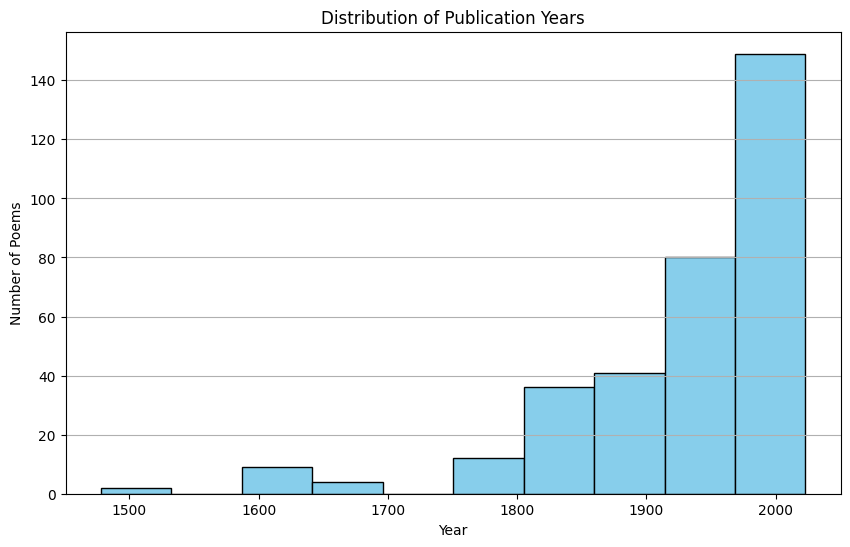

In [ ]:
# Plot the distribution of publication years
plt.figure(figsize=(10, 6))
flattened_data['Date'] = pd.to_numeric(flattened_data['Date'], errors='coerce')  # Convert to numeric for sorting
flattened_data['Date'].dropna().astype(int).plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Poems')
plt.grid(axis='y')
plt.show()

In [ ]:
# Analyze poem lengths (words and lines)
flattened_data['Word Count'] = flattened_data['Poem'].apply(lambda x: len(str(x).split()))
flattened_data['Line Count'] = flattened_data['Poem'].apply(lambda x: len(str(x).splitlines()))

print("\n5. Average poem length (words):", flattened_data['Word Count'].mean())
print("6. Average poem length (lines):", flattened_data['Line Count'].mean())


5. Average poem length (words): 319.4776119402985
6. Average poem length (lines): 45.4


In [ ]:
# Display the first few rows
print("Sample Data:")
print(flattened_data.head())
# Display the poems with the longest and shortest word counts
longest_poem = flattened_data.loc[flattened_data['Word Count'].idxmax()]
shortest_poem = flattened_data.loc[flattened_data['Word Count'].idxmin()]

print("\n7. Longest Poem:")
print(longest_poem[['Title', 'Author', 'Word Count']])

print("\n8. Shortest Poem:")
print(shortest_poem[['Title', 'Author', 'Word Count']])

Sample Data:
                         Title                 Author    Date  \
0            A Line-storm Song           Robert Frost  1913.0   
1              The Weary Blues        Langston Hughes  1926.0   
2  Morning in the Burned House        Margaret Atwood  1995.0   
3                    On Living           Nâzim Hikmet  1994.0   
4     I Could Be a Whale Shark  Aimee Nezhukumatathil  2018.0   

                                                Poem  Word Count  Line Count  
0  The line-storm clouds fly tattered and swift,\...         215          32  
1  Droning a drowsy syncopated tune,\nRocking bac...         284          36  
2  In the burned house I am eating breakfast.\nYo...         229          36  
3  Living is no laughing matter:\n\tyou must live...         408          60  
4  From Oceanic (Copper Canyon Press, 2018). Copy...          31           1  

7. Longest Poem:
Title         The Ballad of Reading Gaol
Author                       Oscar Wilde
Word Count            

In [ ]:
# Save the cleaned dataset for further analysis
flattened_data.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.
